# Dyskretna Transformacja Fourier


In [95]:
import numpy as np

def dft_matrix(n):
    xi = np.exp(-2j * np.pi / n)

    j = np.arange(n).reshape((n, 1))
    k = np.arange(n).reshape((1, n))
    F = xi ** (j * k)
    return F


def dft(x):
    n = len(x)
    Fn = dft_matrix(n)  # macierz DFT
    y = np.dot(Fn, x)   # Obliczenie DFT jako iloczyn macierzy i wektora
    return y

# Przykład użycia
x = np.array([1, 2, 3, 4])  # Wektor wejściowy
y = dft(x)  # Obliczenie DFT
print("Wynik DFT:", y)

Wynik DFT: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


In [96]:
def idft(y):
    n = len(y)
    Fn_inv = np.conj(dft_matrix(n)) / n  # Macierz odwrotna Fouriera
    x = np.dot(Fn_inv, y)
    return x



In [97]:
import numpy as np
import timeit

def fft_cooley_tukey(x_vec):
    x_vec = np.asarray(x_vec, dtype=complex)
    n = len(x_vec)

    if n <= 0:
        return np.array([], dtype=complex)
    if n == 1:
        return x_vec


    x_even = fft_cooley_tukey(x_vec[0::2])
    x_odd = fft_cooley_tukey(x_vec[1::2])


    y_vec = np.zeros(n, dtype=complex)
    twiddle_factors = np.exp(-2j * np.pi * np.arange(n // 2) / n)

    y_vec[:n//2] = x_even + twiddle_factors * x_odd
    y_vec[n//2:] = x_even - twiddle_factors * x_odd

    return y_vec

# Porównanie szybkości działania
sizes = [2**i for i in range(5, 12)]
results = []

for size in sizes:
    x = np.random.random(size) + 1j * np.random.random(size)  # Dane wejściowe (zespolone)

    # Pomiar czasu dla FFT Cooley-Tukey
    fft_cooley_tukey_time = timeit.timeit(lambda: fft_cooley_tukey(x), number=10)

    # Pomiar czasu dla DFT (macierz Fn)
    dft_time = timeit.timeit(lambda: dft(x), number=10)

    # Pomiar czasu dla FFT bibliotecznego
    np_fft_time = timeit.timeit(lambda: np.fft.fft(x), number=10)


    results.append((size, fft_cooley_tukey_time, dft_time, np_fft_time))

# Wyświetlenie wyników
print("{:<8}{:<15}{:<15}{:<15}".format("Rozmiar", "Cooley", "DFT", "FFT Biblioteczny"))
for size, fft_cooley_tukey_time, dft_time, np_fft_time in results:
    print("{:<8}{:<15.6f}{:<15.6f}{:<15.6f}".format(size, fft_cooley_tukey_time, dft_time, np_fft_time))

Rozmiar Cooley         DFT            FFT Biblioteczny
32      0.003699       0.001824       0.000146       
64      0.006299       0.003096       0.000139       
128     0.011317       0.010937       0.000130       
256     0.019413       0.042149       0.000140       
512     0.039236       0.177202       0.000222       
1024    0.080075       0.747006       0.000236       
2048    0.157804       3.053470       0.000433       


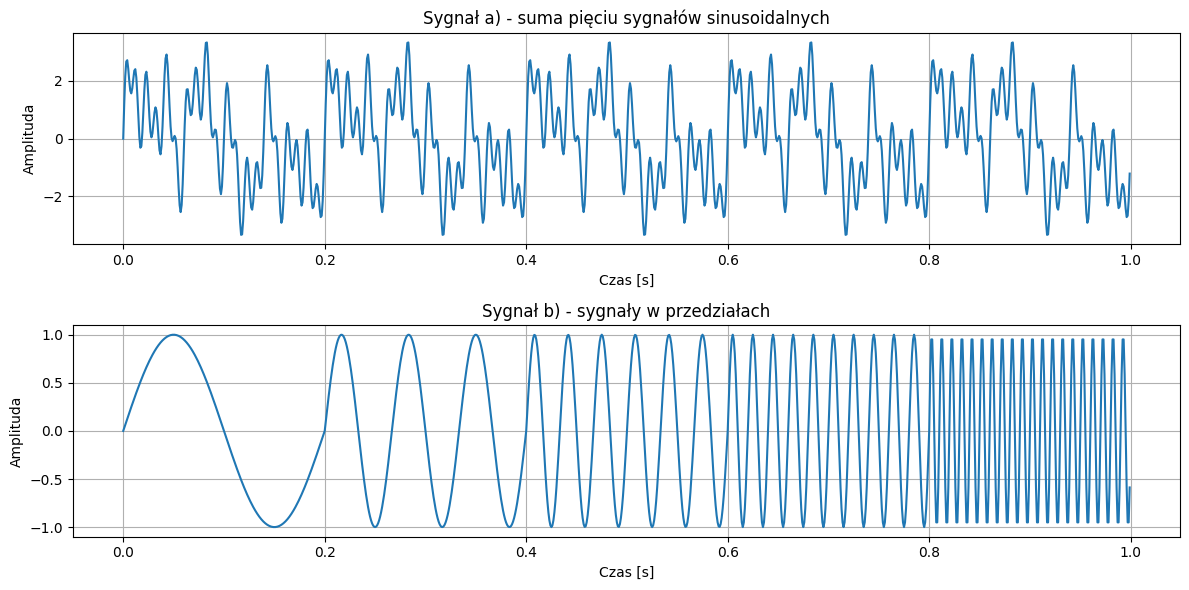

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
fs = 1000
T = 1
t = np.linspace(0, T, fs * T, endpoint=False)
frequencies = [5, 15, 30, 50, 100]

signal_a = sum(np.sin(2 * np.pi * f * t) for f in frequencies)

signal_b = np.zeros_like(t)
interval_length = len(t) // len(frequencies)

for i, f in enumerate(frequencies):
    start = i * interval_length
    end = (i + 1) * interval_length
    signal_b[start:end] = np.sin(2 * np.pi * f * t[start:end])

# Wizualizacja
plt.figure(figsize=(12, 6))

# Sygnał a)
plt.subplot(2, 1, 1)
plt.title("Sygnał a) - suma pięciu sygnałów sinusoidalnych")
plt.plot(t, signal_a)
plt.grid()

# Sygnał b)
plt.subplot(2, 1, 2)
plt.title("Sygnał b) - sygnały w przedziałach")
plt.plot(t, signal_b)
plt.grid()

plt.tight_layout()
plt.show()


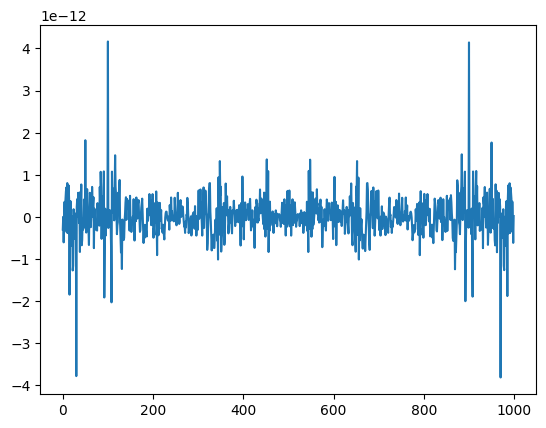

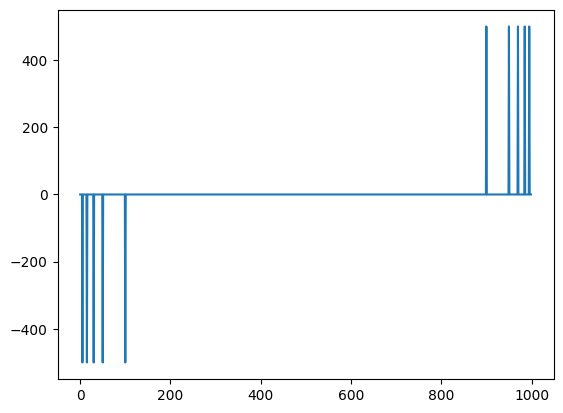

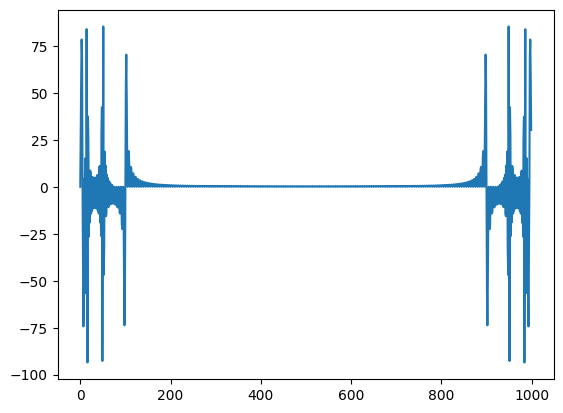

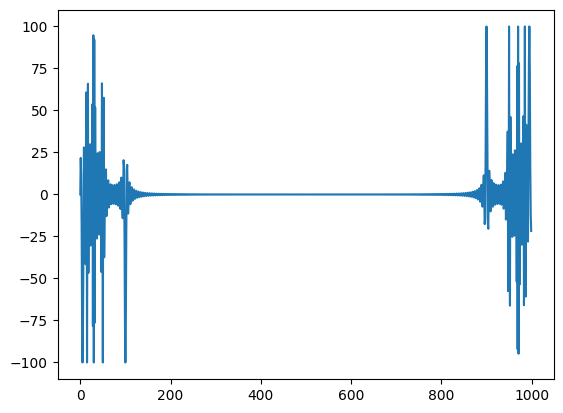

In [99]:
fft_a = np.fft.fft(signal_a)
fft_b = np.fft.fft(signal_b)

# Część rzeczywista i urojona
real_a = np.real(fft_a)
imag_a = np.imag(fft_a)

real_b = np.real(fft_b)
imag_b = np.imag(fft_b)

plt.plot(real_a)
plt.show()


plt.plot(imag_a)
plt.show()


plt.plot(real_b)
plt.show()


plt.plot(imag_b)
plt.show()

